In [2]:
import pandas as pd
# Import the data using the file path
filepath = ('/content/heart (1).csv')
data = pd.read_csv(filepath)#instead of print read
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
data.dtypes.value_counts()

int64      13
float64     1
Name: count, dtype: int64

In [8]:
data.drop(["oldpeak"],axis=1,inplace=True) #drops then coln oldpeak

In [9]:
data.dtypes.value_counts()

int64    13
Name: count, dtype: int64

In [10]:
data.columns #recheck

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
from sklearn.preprocessing import MinMaxScaler #minmax scaler to ensure values lie btw 0&1

msc = MinMaxScaler()
m=msc.fit_transform(data)
Data = pd.DataFrame(m,columns=data.columns)

In [12]:
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,1.0,0.00,0.666667,1.0


In [14]:
x_cols = [x for x in Data.columns if x != 'target']

X_data = Data[x_cols]
y_data = Data['target'] #seperating target coloumn and features

In [15]:
from sklearn.neighbors import KNeighborsClassifier
#training in knn
knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [16]:
def accuracy(real, predict): #to check accuracy
    return sum(y_data == y_pred) / float(real.shape[0])

In [24]:
print(accuracy(y_data, y_pred))

1.0


In [23]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance',p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))



1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [20]:
score_list = list()
#empty list
for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)

    y_pred = knn.predict(X_data.values)
    score = accuracy(y_data, y_pred)
#data for graph
    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

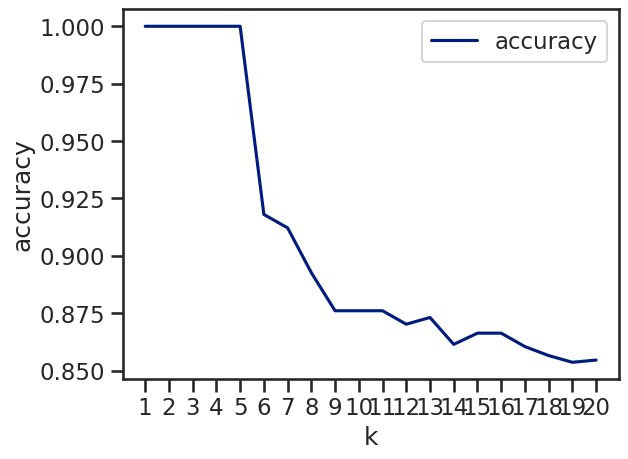

In [22]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));